In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
db_path = '../database/drone_definitions.db'
conn = sqlite3.connect(db_path)
# conn = sqlite3.connect('your_database.db')

# Execute the query and fetch the results into a DataFrame
query = """
    SELECT model_name, 
           COUNT(CASE WHEN sum_distance = best_definitions.min_distance THEN 1 END) AS best_definition_count,
           COUNT(CASE WHEN sum_distance = worst_definitions.max_distance THEN 1 END) AS worst_definition_count
    FROM definitions
    INNER JOIN (
        SELECT term_id, 
               MIN(sum_distance) AS min_distance, 
               MAX(sum_distance) AS max_distance
        FROM definitions
        WHERE model_id IN (1, 2, 3, 7, 8)
        GROUP BY term_id
    ) AS best_definitions ON definitions.term_id = best_definitions.term_id
    INNER JOIN (
        SELECT term_id, 
               MIN(sum_distance) AS min_distance, 
               MAX(sum_distance) AS max_distance
        FROM definitions
        GROUP BY term_id
    ) AS worst_definitions ON definitions.term_id = worst_definitions.term_id
    WHERE model_id IN (1, 2, 3, 7, 8)
    GROUP BY model_name
"""
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


In [11]:
df['model_name'] = df['model_name'].replace({'chatgpt': 'davinci-002', 'gptturbo': 'gpt3.5'})
df

,model_name,best_definition_count,worst_definition_count
0,davinci-002,54,43
1,chatsonic,19,31
2,claude,7,133
3,gpt4,94,16
4,gpt3.5,74,20


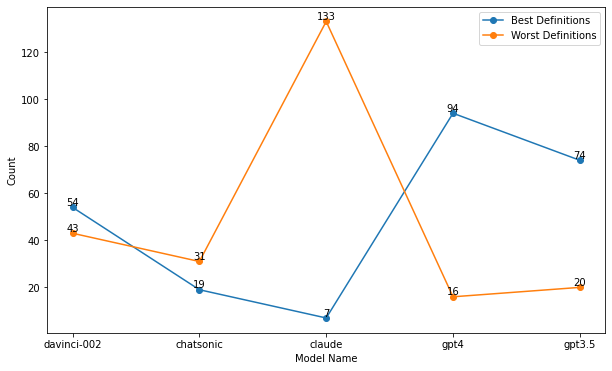

In [13]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['model_name'], df['best_definition_count'], marker='o', label='Best Definitions')
plt.plot(df['model_name'], df['worst_definition_count'], marker='o', label='Worst Definitions')
plt.xlabel('Model Name')
plt.ylabel('Count')
# plt.title('Number of Best and Worst Definitions Generated by Each Model')
# plt.xticks(rotation=45)
# Add value labels to each data point
for i, j, k in zip(df['model_name'], df['best_definition_count'], df['worst_definition_count']):
    plt.text(i, j, str(j), ha='center', va='bottom')
    plt.text(i, k, str(k), ha='center', va='bottom')
plt.legend()
plt.savefig('../analysis/visualization/best_worst.pdf')
plt.show()

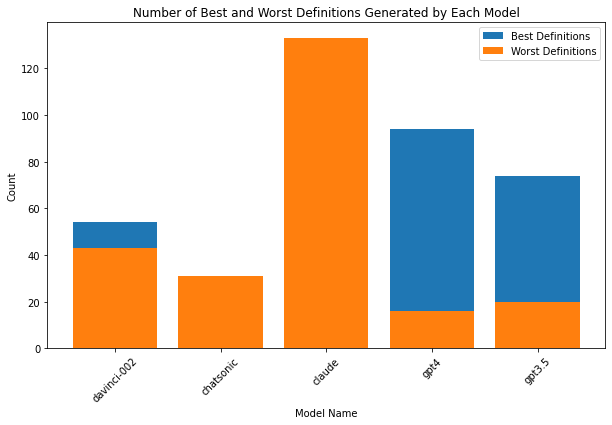

In [20]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['model_name'], df['best_definition_count'], label='Best Definitions')
plt.bar(df['model_name'], df['worst_definition_count'], label='Worst Definitions')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.title('Number of Best and Worst Definitions Generated by Each Model')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('../analysis/visualization/best_worst_bar.pdf')

plt.show()

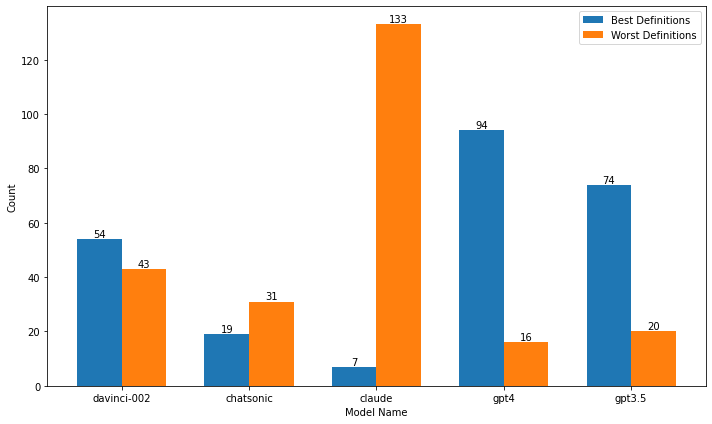

In [21]:
import numpy as np
# Set the bar width
bar_width = 0.35

# Create a range of indices for the x-axis ticks
x = np.arange(len(df['model_name']))

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(x, df['best_definition_count'], width=bar_width, label='Best Definitions')
plt.bar(x + bar_width, df['worst_definition_count'], width=bar_width, label='Worst Definitions')

# Add value labels on top of each bar
for i, value in enumerate(df['best_definition_count']):
    plt.text(i, value, str(value), ha='center', va='bottom')
for i, value in enumerate(df['worst_definition_count']):
    plt.text(i + bar_width, value, str(value), ha='center', va='bottom')

plt.xlabel('Model Name')
plt.ylabel('Count')
# plt.title('Number of Best and Worst Definitions Generated by Each Model')
plt.xticks(x + bar_width/2, df['model_name'])
plt.legend()
plt.tight_layout()
plt.savefig('../analysis/visualization/best_worst_bar.pdf')
plt.show()